#  **BOX OFFICE ANALYSIS FOR BUSINESS EXPANSION**

# UNDERSTANDING THE BUSINESS PROBLEM

## **INTRODUCTION**.

Our company stands at the precipice of an exciting new venture: the establishment of an original movie studio. In an era where leading enterprises are increasingly venturing into video content creation, this initiative represents a strategic move to diversify our portfolio and tap into an influential market. However, as newcomers to the film industry, a fundamental understanding of what makes a movie successful at the box office is important.

## **OBJECTIVES**

1. Collect and investigate the box office data.

2. Find out which movie genres have historically performed best.

3. Identify trends in both domestic and international box office.

4. Perform Exploratory Data Analysis (EDA) and identify key attributes that influence box office success.



## **DATA UNDERSTANDING**

1. Box Office Mojo

*bom.movie_gross.csv*

This dataset contains gross earnings data where we can understand how much money movies make.

2. IMDB

*im.db*

Contains information on genres, movie titles, release dates, runtime and ratings.

3. The Numbers

*tn.movie_budgets.csv*

This provides production budget estimates and deeper metrics.

4. Rotten Tomatoes

*rt.movie_info.tsv,  rt.reviews.tsv*

They contain movie synopsis, genre, director and writer information about a movie.



For this analysis I will be using the im.db and tn.movie_budgets.csv datasets.

# DATA FAMILIARIZATION

In [2]:
# importing the necessary libraries.
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Establishing a connection to the database
conn = sqlite3.connect('im.db')

# Checking available tables (optional, good for understanding structure)
pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [4]:
# Storing the data in movie_basics table in a dataframe basics
m_basics = """
select * from movie_basics
;
"""
basics = pd.read_sql(m_basics, conn)

In [5]:
# Checking the first 5 entries
basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [6]:
basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


The basics dataframe contains a total of 146144 entries.

genres, runtime_minutes, original_title have some missing entries.

In [7]:
basics.isnull().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [8]:
# Storing the data in movie_ratings table in a dataframe ratings
m_ratings = """
select * from movie_ratings
;
"""
ratings = pd.read_sql(m_ratings, conn)

In [9]:
ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [10]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


Ratings has a total of 73856 entries and no null values.

In [11]:
# Merging the two  dataframes

movie_df = pd.merge(basics, ratings, on='movie_id', how='inner')
movie_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [12]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


The new dataframe has a total of 73856 entries.

runtime_minutes, genres have some null values.

In [13]:
# checking the total sum of null values
movie_df.isnull().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [14]:
# Loading the second dataset that i will use in my analysis.
budget_df = pd.read_csv('tn.movie_budgets.csv')
budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [15]:
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


*   This dataframe has a total of 5782 entries.

* There are no null values in the columns.

* The datatypes of production_budget, domestic_gross, worldwide_gross are string (object) I will change this later on.

# DATA CLEANING

## MOVIE_DF CLEANING

In this dataframe, I will:

* Deal with the missing values by filling missing runtime_minutes values with the median and filling missing genres with the string "Unknown"

* Check for duplicates.

In [16]:
movie_df.isnull().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [17]:
# fill missing values in 'genres' with unknown
movie_df['genres'].fillna('Unknown', inplace=True)

# fill missing values in 'runtime_minutes' with the median
runtime_median = movie_df['runtime_minutes'].median()
movie_df['runtime_minutes'].fillna(runtime_median, inplace=True)

movie_df.isnull().sum()

/tmp/ipykernel_4250/2637497624.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movie_df['genres'].fillna('Unknown', inplace=True)
/tmp/ipykernel_4250/2637497624.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [18]:
movie_df.duplicated().sum()

0

## BUDGET_DF CLEANING

In this dataframe I will:

1. convert the production_budget, domestic_gross, worldwide_gross columns to float and drop the $ and ,

2. create a new column known as total_gross containing: domestic_gross + worldwide_gross

3. create another column profit containing: total_gross - production_budget

4. split the release_date and crete a new column: year

In [19]:
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [20]:
budget_df.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


In [21]:
# Converting the three columns to float and dropping $ and ,
budget_df['production_budget'] = budget_df['production_budget'].str.replace('$','').str.replace(',','').astype(float)
budget_df['domestic_gross'] = budget_df['domestic_gross'].str.replace('$','').str.replace(',','').astype(float)
budget_df['worldwide_gross'] = budget_df['worldwide_gross'].str.replace('$','').str.replace(',','').astype(float)

budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [22]:
budget_df['total_gross'] = budget_df['domestic_gross'] + budget_df['worldwide_gross']
budget_df['profit'] = budget_df['total_gross'] - budget_df['production_budget']
budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09,3.111853e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.286728e+09,8.761278e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.925247e+08,-1.574753e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.862020e+09,1.531420e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.936903e+09,1.619903e+09


In [23]:
# Converting the release_date column to datetime
budget_df['release_date'] = pd.to_datetime(budget_df['release_date'])

# Creating the year column.
budget_df['Year'] = budget_df['release_date'].dt.year

In [24]:
budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,profit,Year
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09,3.111853e+09,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.286728e+09,8.761278e+08,2011
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.925247e+08,-1.574753e+08,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.862020e+09,1.531420e+09,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.936903e+09,1.619903e+09,2017


In [25]:
# checking for duplicates.
budget_df.duplicated().sum()

0

# EXPLORATORY DATA ANALYSIS

In this section I will perform EDA in determining attributes such as genre, average rating, runtime minutes, etc that may influence revenue.

From the *movie_df*  dataset, i will provide visuals that answer questions like:

* Which genres have most movies?
* Which genres have the highest ratings?
* What is the trend of rating per year?
* What is the correlation between attributes such as: *averagerating, runtime_minutes, numvotes, start_year*?
* Which genres have highest profit?

From the *budget_df*  dataset I will provide some visuals tha answer questions like:

* What is the correlation between attributes such as: *domestic_gross, worldwide_gross, total_gross, profit, Year*?

* What is the trend of *total_gross* over the years?

## 1. TOP 20 MOVIE GENRES

This bar plot displays the 20 most common genres based on the number of movies produced.

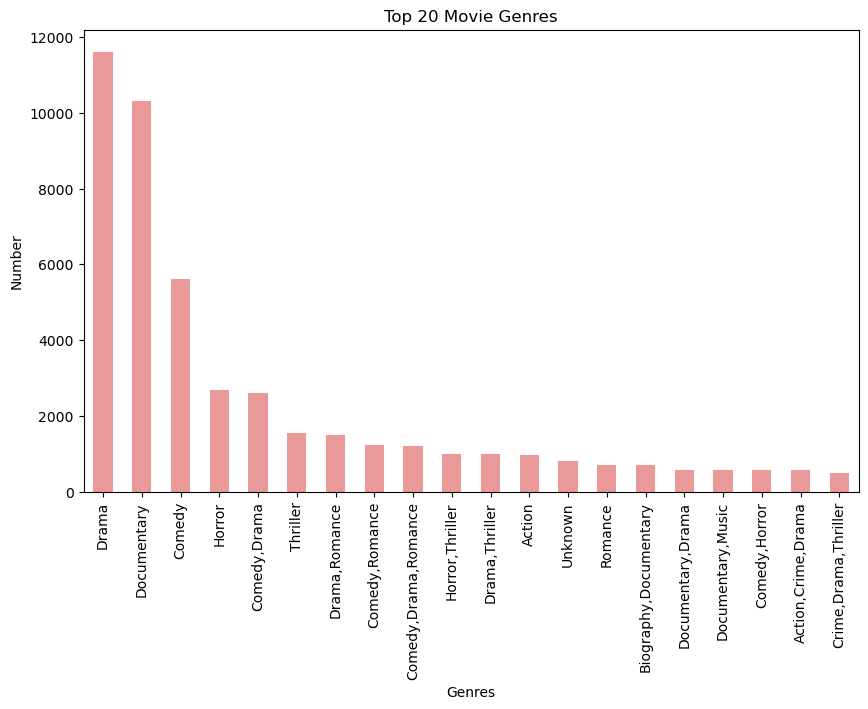

In [65]:
# Barplot of top 20 genres
plt.figure(figsize=(10, 6))
movie_df['genres'].value_counts().head(20).plot(kind='bar', color='#EA9999')
plt.title('Top 20 Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Number')
plt.show()

**Key Observation:**

* Drama, Documentary, Comedy, Horror, Commedy Drama are the top 5 genres by number of movies. These genres have significantly more movies compared to others reflecting a consistent market demand and broad appeal from the audience.

* After these genres there is a notable decline. This suggests that there is a smaller but steady presence.

* There is 'genre blending'. Majority of the entries combine multiple genres indicating that *genre hybridity* is a common startegy to appeal to the wider audience.

**Important Outcomes**

* It would be strategic to start with popular genres such as *Drama and Comedy* to reach a broader audience

* There is competiotion in the top genres therefore combining different genres could offer a differention in the market and appeal to the niche markets.


## 2. TOP 10 GENRE BY RATING
This barplot shws the top 10 genres by ratings. It groups the data by genre and the mean of ratings.

Top 10 Movie Genres by Average Rating:
                        Genres  Average Rating
0   Comedy,Documentary,Fantasy             9.4
1   Documentary,Family,Musical             9.3
2                History,Sport             9.2
3                    Game-Show             9.0
4                Music,Mystery             9.0
5      Comedy,Drama,Reality-TV             8.8
6  Documentary,News,Reality-TV             8.8
7       Documentary,News,Sport             8.8
8            Drama,Fantasy,War             8.8
9                  Drama,Short             8.8


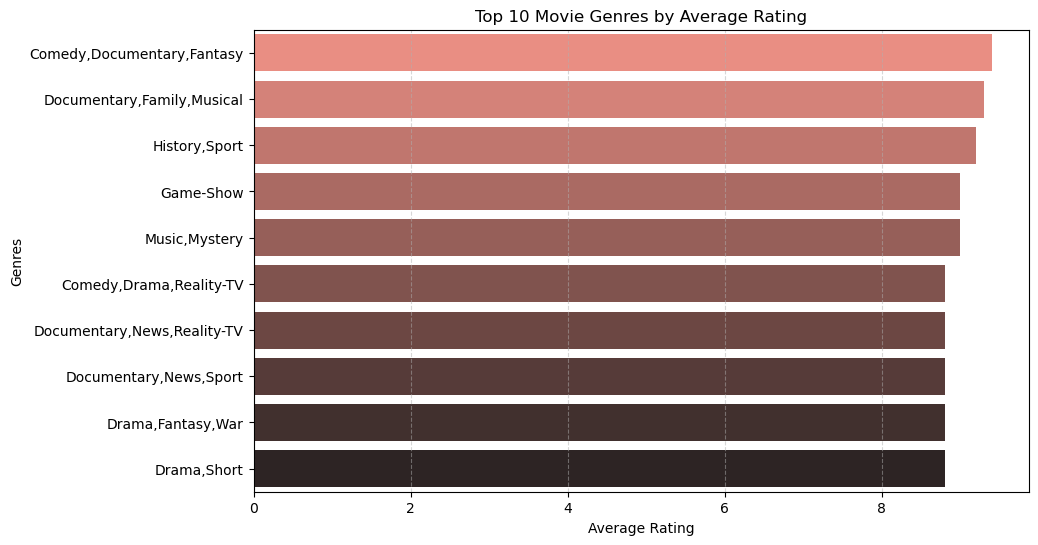

In [54]:
# grouping the genre by average ratings
top_10_genre_by_ratings = movie_df.groupby('genres')['averagerating'].mean().nlargest(10).reset_index()
top_10_genre_by_ratings.columns = ['Genres', 'Average Rating']
print("Top 10 Movie Genres by Average Rating:")
print(top_10_genre_by_ratings)

# plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_genre_by_ratings, x='Average Rating', y='Genres', palette='dark:salmon_r', hue='Genres', legend=False)
plt.title('Top 10 Movie Genres by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Genres')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

**Key Observations**

* The higher-rated genres such as Documentary, Comedy, Fantasy usually focus on deeper storytelling that appeal to a larger audience.

* **Outcomes:** Focusing on the highly rated genres could help the studio appeal to the wider audience.

## 3. TOP GENRES BY NO. OF VOTES

This plot shows the top 10 movie genres that received the highest number of votes from the audience.

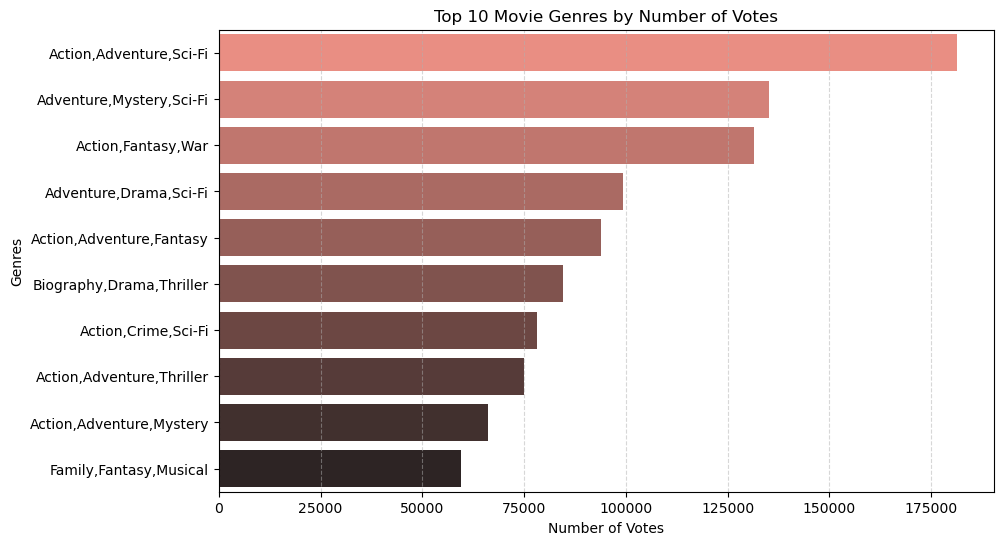

In [55]:
# grouping the genre and numvotes
top_10_genre_votes = movie_df.groupby('genres')['numvotes'].mean().nlargest(10).reset_index()

# plotting the top 10 movie genres by number of votes
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_genre_votes, x='numvotes', y='genres', palette='dark:salmon_r', hue='genres', legend=False)
plt.title('Top 10 Movie Genres by Number of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Genres')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

**Key Observations:**

* The genres displayed had the most participation from the viewers compared to others. This indicates a strong public interest with these genres.

* Some genres such as Action, Adventure, Sci-fi appear on this list despite having a lower average rating. This suggests that these genres attract a huge audience.

**Outcomes:**

* If the new studio's main objective is having a maximum audience engagement, then producing movies within the highly voted genres increases the chance of reaching a large audience.

## 4. RATING PER YEAR



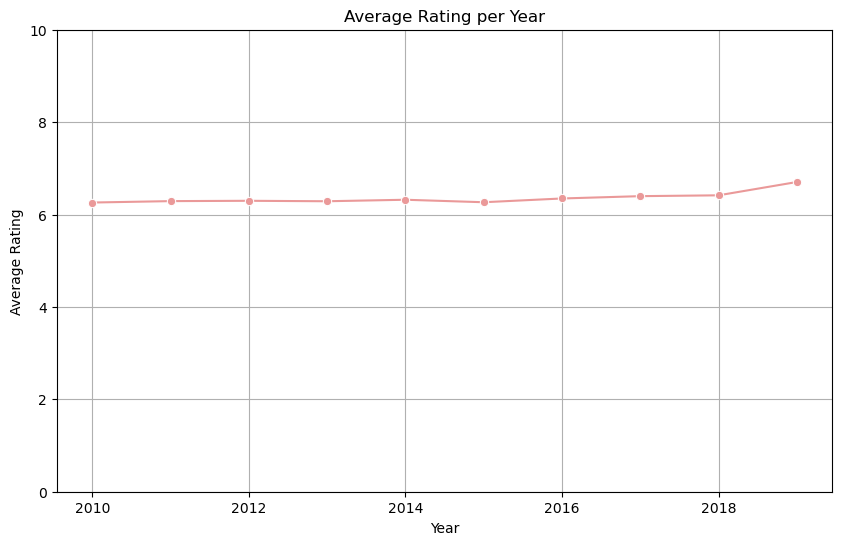

In [66]:
average_rating_per_year = movie_df.groupby('start_year')['averagerating'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_rating_per_year, x='start_year', y='averagerating', marker='o', color= '#EA9999')
plt.title('Average Rating per Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.ylim(0, 10) # limit y-axis to 10 ratings
plt.show()

## 5. CORELATION OF THE DIFFERENT MOVIE FEATURES.

This heatmap visualizes the correlation between the numerical features in the *movie_df* dataset.

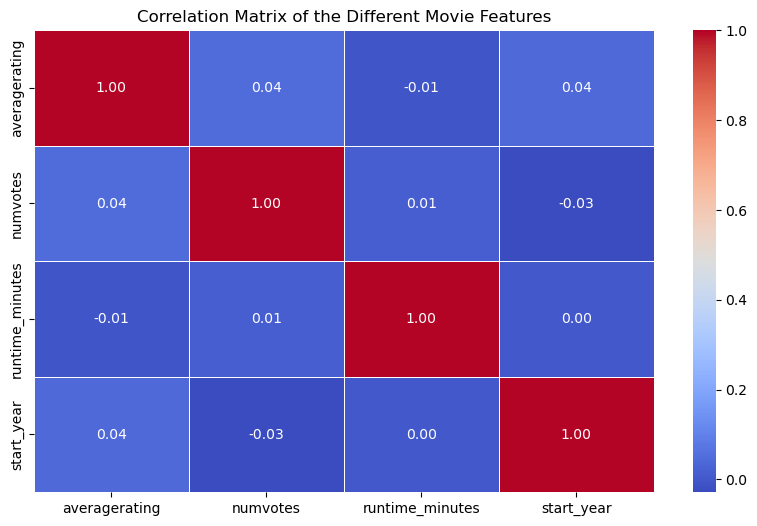

In [57]:
# correlation heatmap for movie_df

# setting the numeric columns
numeric_cols = ['averagerating', 'numvotes', 'runtime_minutes', 'start_year']

# calculating the correlation matrix
corr_matrix = movie_df[numeric_cols].corr()

# plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5
)
plt.title('Correlation Matrix of the Different Movie Features')
plt.show()

**Key Observtions:**

1. averagerating vs numvotes
* A weak to moderate positive relation of 0.04

* This suggests that movies with more votes have a slightly higher average rating.

2. runtime_minutes vs averagerating
* Weak relation

* This indicates that longer movies may receive slighlty better ratings probly due to more developed plots. The effect is minor.



## 6. CORRELATION OF BUDGET DATAFRAME

This heatmap visualizes correlation between numerical features in the *budgets_df* dataset.

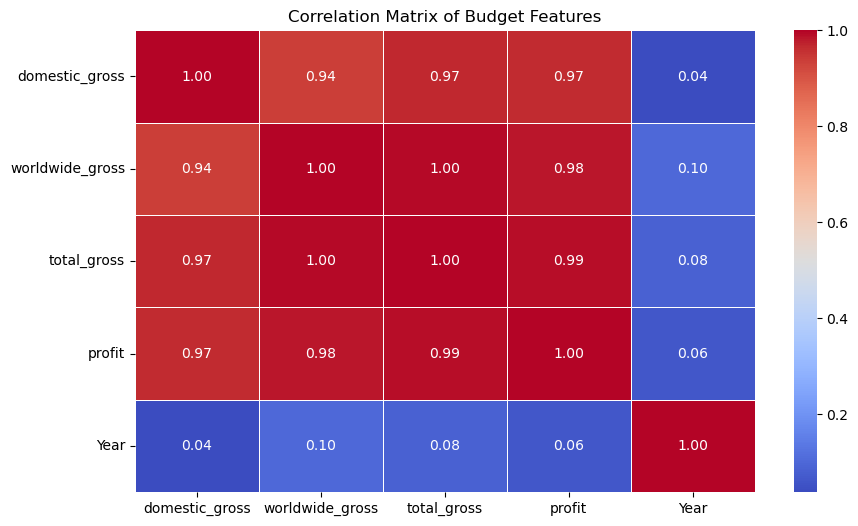

In [33]:
# correlation heatmap for budget_df

# setting the numeric columns
numeric_cols = ['domestic_gross', 'worldwide_gross', 'total_gross', 'profit', 'Year']

# calculating the correlation matrix
corr_matrix = budget_df[numeric_cols].corr()

# plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5
)
plt.title('Correlation Matrix of Budget Features')
plt.show()

**Key Observations**

1. domestic_gross and total_gross

* Strong positive relationship of 0.97

* This indictes that domestic performance heavily influences the total gross

2. worldwide_gross and total_gross

* Strong positive relationship of 1.00

* Also implies that the foreign revenue contributes towards total performance.

3. Year and profit.

* There is a weak relationship of 0.06

* This suggests that movie earnings have not shown a consistent progression over time

* This can be attributed to the economic landscape

## 7. TREND OF TOTAL GROSS OVER THE YEARS

This line plot analyzes the change in average total gross over the years.

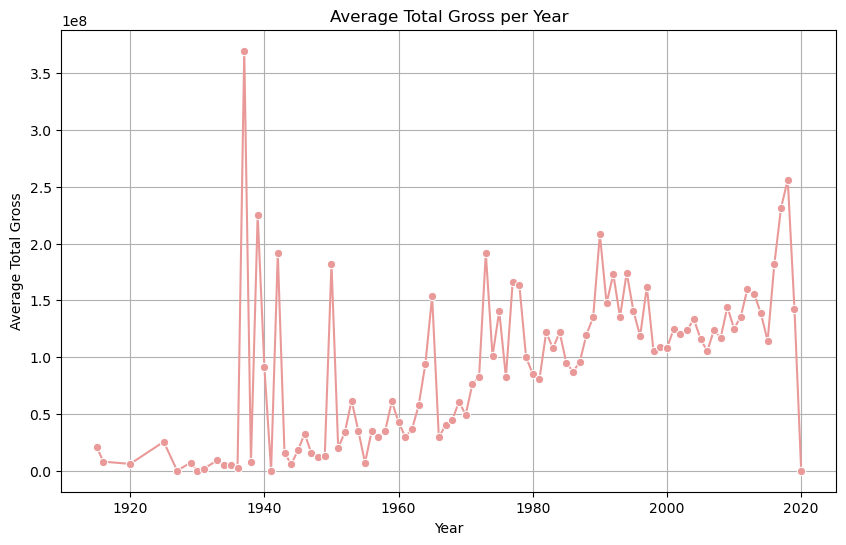

In [67]:
# calculate average total gross per year
average_total_gross_per_year = budget_df.groupby('Year')['total_gross'].mean().reset_index() # reset_index() converts the groupby object to a DataFrame

# plot the average gross per year
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_total_gross_per_year, x='Year', y='total_gross', marker='o', color='#EA9999')
plt.title('Average Total Gross per Year')
plt.xlabel('Year')
plt.ylabel('Average Total Gross')
plt.grid(True)
plt.show()

**Key Observations**

* In the early 20th century the average gross was low and stable, with minor fluctuations. This was the growing stage of the film industry.

* There is a dramatic spike around the 1940s. This could correspond to the increased cinema attendance. This is the highest observed peak across the entire dataset.

* There is a decline and stagnation around the 1950s to 1970s. Starting the 1980s to 2000s is a volatile upward trend. This aligns with the improved special effects and the blockbuster era.

* There is a steady increase from the 200s to 2020s. The sharp drop towards 2020 reflects the impact of the COVID-19 pandemic on cinema operations and releases.

**Key Outtakes**

* The film market is resilient but volatile. The overall trend suggests that there is a recovery and growth capacity in the longterm. Although the market is susceptible to external factors.

* The massive spike in the 1940s and the strong peak in the late 2010s demonstrate that movies can achieve exceptionally high average gross when conditions are right.


## 8. GENRES BY PRODUCTION COST
This barplot shows which genres had the highest budget.

In [35]:
# merging the two datasets to get which genres have highest revenue
genre_gross_df = pd.merge(budget_df, movie_df, left_on='movie', right_on='primary_title', how='inner')

Top 20 Movie Genres by Production Budget:
                        Genres  Production Budget
0      Action,Adventure,Sci-Fi       9.315400e+09
1   Adventure,Animation,Comedy       7.139000e+09
2                        Drama       5.904314e+09
3     Action,Adventure,Fantasy       5.190600e+09
4                  Documentary       3.061017e+09
5       Action,Adventure,Drama       2.789100e+09
6                       Comedy       2.746201e+09
7      Action,Adventure,Comedy       2.407000e+09
8     Adventure,Family,Fantasy       2.116400e+09
9   Action,Adventure,Animation       1.957500e+09
10   Action,Adventure,Thriller       1.711000e+09
11                Comedy,Drama       1.540189e+09
12       Action,Crime,Thriller       1.504600e+09
13               Drama,Romance       1.487840e+09
14                      Horror       1.458111e+09
15          Action,Crime,Drama       1.344050e+09
16         Action,Comedy,Crime       1.263090e+09
17                    Thriller       1.259063e+09
18      

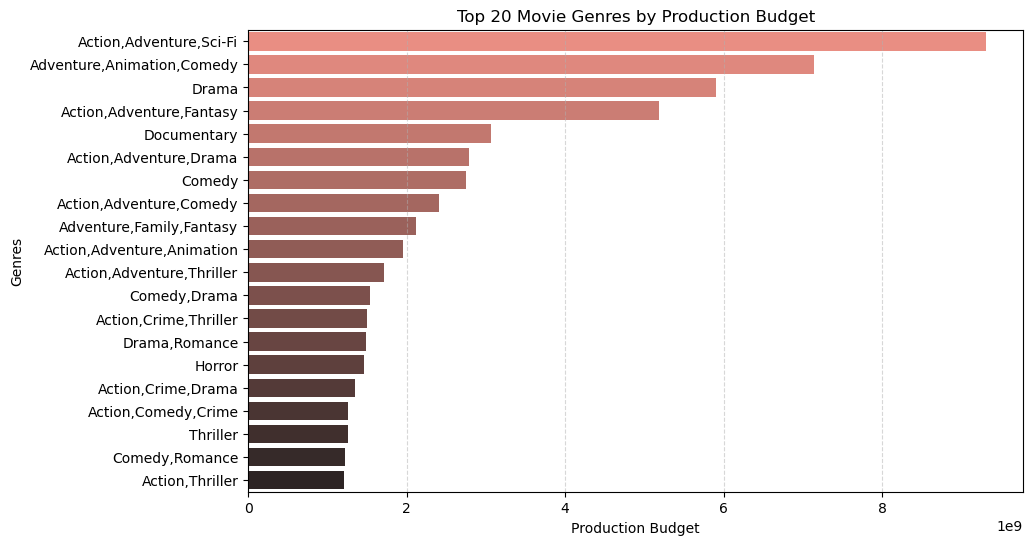

In [58]:
top_20_genre_by_budget = genre_gross_df.groupby('genres')['production_budget'].sum().nlargest(20).reset_index()
top_20_genre_by_budget.columns = ['Genres', 'Production Budget']
print("Top 20 Movie Genres by Production Budget:")
print(top_20_genre_by_budget)

# plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=top_20_genre_by_budget, x='Production Budget', y='Genres', palette='dark:salmon_r', hue='Genres', legend=False)
plt.title('Top 20 Movie Genres by Production Budget')
plt.xlabel('Production Budget')
plt.ylabel('Genres')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

**Key Observations**

* *Action* , *Adventure* occupy most of the genres as hybrids of other genres.
* *Drama, Documentary, Comedy* have a rather higher production budget as standalone genres. 

## 8. GENRES BY GROSS TOTAL
This bar plot shows top 20 genres by total gross

Top 20 Movie Genres by Total Gross:
                        Genres   Total Gross
0      Action,Adventure,Sci-Fi  4.752831e+10
1   Adventure,Animation,Comedy  3.720312e+10
2                        Drama  2.065824e+10
3     Action,Adventure,Fantasy  1.839609e+10
4      Action,Adventure,Comedy  1.297960e+10
5                  Documentary  1.027126e+10
6   Action,Adventure,Animation  1.010021e+10
7                       Comedy  9.939038e+09
8                       Horror  8.882543e+09
9     Adventure,Family,Fantasy  7.884969e+09
10      Action,Adventure,Drama  7.630221e+09
11       Action,Crime,Thriller  6.294841e+09
12                Comedy,Drama  6.256192e+09
13              Comedy,Romance  6.202611e+09
14   Action,Adventure,Thriller  6.045443e+09
15               Drama,Romance  5.901693e+09
16     Horror,Mystery,Thriller  5.467878e+09
17             Action,Thriller  5.269410e+09
18         Action,Comedy,Crime  4.823973e+09
19             Horror,Thriller  4.445479e+09


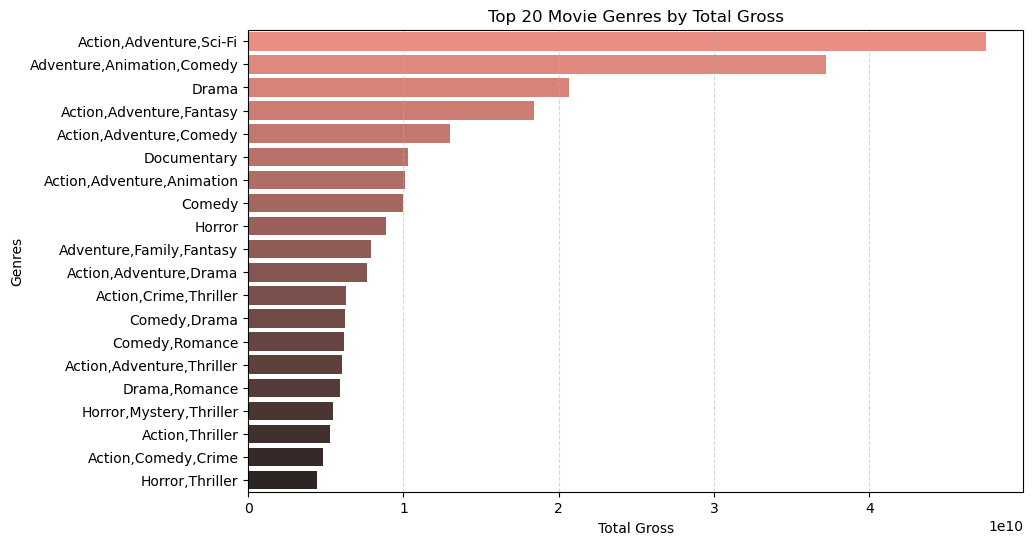

In [59]:
top_20_genre_by_gross = genre_gross_df.groupby('genres')['total_gross'].sum().nlargest(20).reset_index()
top_20_genre_by_gross.columns = ['Genres', 'Total Gross']
print("Top 20 Movie Genres by Total Gross:")
print(top_20_genre_by_gross)

# plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=top_20_genre_by_gross, x='Total Gross', y='Genres', palette='dark:salmon_r', hue='Genres', legend=False)
plt.title('Top 20 Movie Genres by Total Gross')
plt.xlabel('Total Gross')
plt.ylabel('Genres')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

**Key Observations**

* Action and Adventure dominate most of the top grossing genres in combination with other genres such as Comedy, Fantasy and Sci-Fi

* While combinations lead, *Drama* (rank 2, 10, 15) and *Comedy* (rank 6, 12, 13) still hold significant individual positions, indicating consistent audience appeal. *Documentary* (rank 5) also surprisingly makes it into the top 10 as a standalone genre, suggesting a niche with strong earning potential.

* *Horror* (rank 8) and its combinations with *Mystery* and *Thriller* (ranks 16, 19) appear in the top 20, indicating a consistent, albeit perhaps not top-tier, audience.

**Key Observations**

* Our initial focus should heavily lean into genres that consistently demonstrate massive box office potential, primarily those incorporating *Action* and *Adventure.* This indicates broad audience appeal and strong commercial viability.

* The strong performance of *Adventure, Animation, Comedy* and *Adventure, Family, Fantasy* highlights the lucrative nature of family-oriented films. Investing in high-quality animated features or live-action family adventures can tap into a consistent and profitable market.


## 9. GENRE BY PROFIT.
This bar plot shows top 20 genres with highest profit.

Top 20 Movie Genres by Profit:
                        Genres        Profit
0      Action,Adventure,Sci-Fi  3.821291e+10
1   Adventure,Animation,Comedy  3.006412e+10
2                        Drama  1.475393e+10
3     Action,Adventure,Fantasy  1.320549e+10
4      Action,Adventure,Comedy  1.057260e+10
5   Action,Adventure,Animation  8.142708e+09
6                       Horror  7.424431e+09
7                  Documentary  7.210241e+09
8                       Comedy  7.192837e+09
9     Adventure,Family,Fantasy  5.768569e+09
10              Comedy,Romance  4.981739e+09
11     Horror,Mystery,Thriller  4.940418e+09
12      Action,Adventure,Drama  4.841121e+09
13       Action,Crime,Thriller  4.790241e+09
14                Comedy,Drama  4.716003e+09
15               Drama,Romance  4.413853e+09
16   Action,Adventure,Thriller  4.334443e+09
17             Action,Thriller  4.063910e+09
18             Horror,Thriller  3.832604e+09
19         Action,Comedy,Crime  3.560883e+09


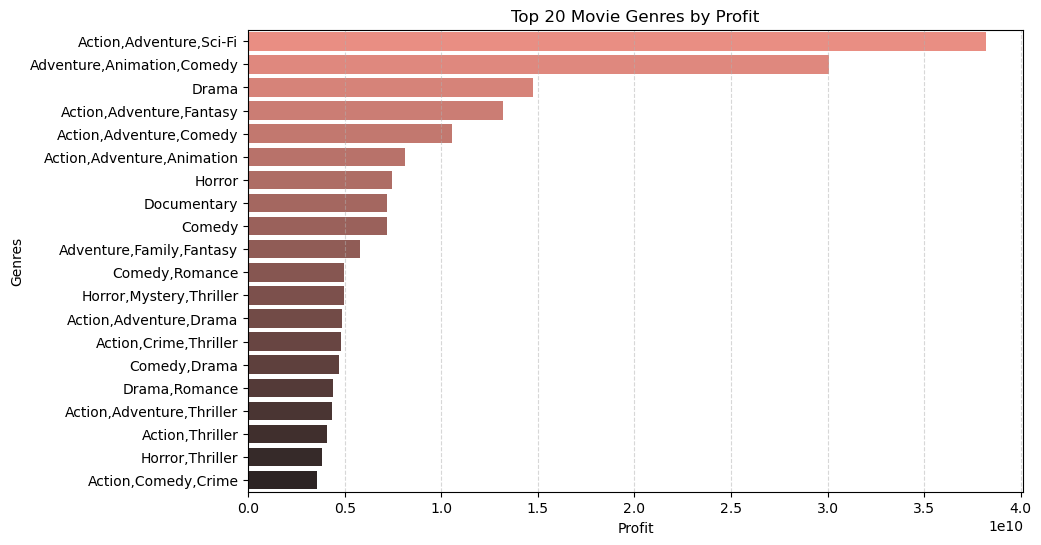

In [60]:
top_20_genre_by_profit = genre_gross_df.groupby('genres')['profit'].sum().nlargest(20).reset_index()
top_20_genre_by_profit.columns = ['Genres', 'Profit']
print("Top 20 Movie Genres by Profit:")
print(top_20_genre_by_profit)

# plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=top_20_genre_by_profit, x='Profit', y='Genres', palette='dark:salmon_r', hue='Genres', legend=False)
plt.title('Top 20 Movie Genres by Profit')
plt.xlabel('Profit')
plt.ylabel('Genres')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

**Key Observations**

* The top genres by profit largely mirror the top genres by total gross. *Action, Adventure, Sci-Fi"* and *Adventure, Animation, Comedy* remain the top two, indicating that these genres not only make a lot of money but also maintain high profitability even after accounting for their likely higher production budgets.

* Just like total gross, combinations featuring *Action* and *Adventure* deliver high profits. These combinations make up a significant portion of the top 20 profit generating genres.

* *Documentary* ranks surprisingly high at number 7 by profit, suggesting that while its total gross might not be as high as the top blockbusters, its typically much lower production budget makes it a very profitable venture. This indicates a high Return on Investment (ROI) potential.

* *Horror* is also showing a strong profitability often known for dedicated fan bases leading to good profit margins.


**Key Outtakes**

* The genres that earn the most also tend to be the most profitable. This reinforces the idea of focusing on the big-budget, high-concept *Action* and *Adventure* films.

* *Documentary* and *Horror* are strong candidates for a studio looking for high profit margins, as their lower production costs can lead to excellent returns even if their absolute gross isn't at the very top.

* Combining genres especially with *Action* and*Adventure* is not just about increasing gross, but also about maximizing the profit potential.

# CONCLUSION.

## **KEY INSIGHTS**

 * Drama and Comedy dominate in frequency thus suggesting a strong audience appeal

 * Documentary and History received high IMDb ratings reflecting strong reception, critically

 * Hybrid genres are popular because they combine different storyteling styles effectively


 * Family-friendly content is highly profitable as it targets a broad family audience.

 * The abrupt and severe decline in average total gross around 2020 underscores the vulnerability of the theatrical market to external, unforeseen global events.



## **RECOMMENDATIONS**

1. Prioritize genres with strong audience interest such as Drama, Comedy, Action, Adventure.  These are the proven categories for generating high total gross and significant profit.

2. Allocate a portion of the production budget to *Documentary* and *Horror* films. These genres offer excellent profit margins due to generally lower production costs and dedicated fan bases.

3. Invest in global distribution strategies since worldwide gross heavily influences the total gros of the film.

4. The historical swings in average total gross, especially the recent drastic drop, emphasize the need for the studio to be highly adaptable. Continuously monitor market trends, audience behavior, and global events to adjust production and distribution strategies swiftly.

## **CONCLUSION**

For our new venture, a data-driven approach is essential for competitive success. We will strategically select genres with proven appeal, ensure intelligent budget allocation, and optimize for global audiences. Our focus will be on impactful storytelling over mere runtime, complemented by precisely timed releases. Embracing these insights is how we'll secure our foothold in the market.